# Predictive modelling using Decision Tree : 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('D3.csv')

In [3]:
data.head(10)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,insulin,change,diabetesMed,readmitted
0,Caucasian,Female,[60-70),2,1,1,4,InternalMedicine,43,0,...,No,No,No,No,No,No,Steady,False,True,1
1,Caucasian,Female,[80-90),3,2,1,8,Invalid,48,6,...,No,No,No,Steady,No,No,Down,True,True,1
2,Caucasian,Female,[80-90),2,1,1,2,Cardiology,39,0,...,No,No,No,No,No,No,No,False,False,0
3,Caucasian,Female,[60-70),3,1,1,2,Invalid,54,0,...,No,No,No,No,No,No,No,False,False,0
4,Caucasian,Female,[60-70),3,2,1,7,Invalid,70,1,...,No,No,No,No,No,No,Down,True,True,1
5,Caucasian,Male,[70-80),2,1,7,3,Emergency/Trauma,1,4,...,No,No,No,No,No,No,Steady,False,True,0
6,Caucasian,Male,[60-70),2,1,1,6,Neurology,28,1,...,No,No,No,No,Steady,No,Up,True,True,0
7,AfricanAmerican,Female,[40-50),1,1,7,3,Surgery-General,48,0,...,No,No,No,No,No,No,Down,True,True,0
8,AfricanAmerican,Male,[70-80),1,1,7,5,Invalid,42,2,...,No,No,No,No,No,No,No,False,True,1
9,AfricanAmerican,Female,[70-80),1,1,7,1,Emergency/Trauma,43,1,...,No,No,No,No,No,No,Up,True,True,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51766 entries, 0 to 51765
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      50750 non-null  object
 1   gender                    51766 non-null  object
 2   age                       51756 non-null  object
 3   admission_type_id         51766 non-null  int64 
 4   discharge_disposition_id  51766 non-null  int64 
 5   admission_source_id       51766 non-null  int64 
 6   time_in_hospital          51766 non-null  int64 
 7   medical_specialty         51766 non-null  object
 8   num_lab_procedures        51766 non-null  int64 
 9   num_procedures            51766 non-null  int64 
 10  num_medications           51766 non-null  int64 
 11  number_outpatient         51766 non-null  int64 
 12  number_emergency          51766 non-null  int64 
 13  number_inpatient          51766 non-null  int64 
 14  number_diagnoses      

In [5]:
data.isnull().mean()*100

race                        1.962678
gender                      0.000000
age                         0.019318
admission_type_id           0.000000
discharge_disposition_id    0.000000
admission_source_id         0.000000
time_in_hospital            0.000000
medical_specialty           0.000000
num_lab_procedures          0.000000
num_procedures              0.000000
num_medications             0.000000
number_outpatient           0.000000
number_emergency            0.000000
number_inpatient            0.000000
number_diagnoses            0.000000
max_glu_serum               0.000000
A1Cresult                   0.000000
metformin                   0.000000
repaglinide                 0.000000
nateglinide                 0.000000
chlorpropamide              0.017386
glimepiride                 0.000000
acetohexamide               0.000000
glipizide                   0.000000
glyburide                   0.000000
tolbutamide                 0.000000
insulin                     0.000000
c

In [6]:
data1 = data.copy(deep=True)

In [7]:
data1.shape

(51766, 30)

In [8]:
data1['race'] = data1['race'].fillna(data1['race'].mode().iloc[0])

In [9]:
data1['age'] = data1['age'].fillna(data1['age'].mode().iloc[0])

In [10]:
data1['chlorpropamide'] = data1['chlorpropamide'].fillna(data1['chlorpropamide'].mode().iloc[0])

In [11]:
data1.isnull().mean()*100

race                        0.0
gender                      0.0
age                         0.0
admission_type_id           0.0
discharge_disposition_id    0.0
admission_source_id         0.0
time_in_hospital            0.0
medical_specialty           0.0
num_lab_procedures          0.0
num_procedures              0.0
num_medications             0.0
number_outpatient           0.0
number_emergency            0.0
number_inpatient            0.0
number_diagnoses            0.0
max_glu_serum               0.0
A1Cresult                   0.0
metformin                   0.0
repaglinide                 0.0
nateglinide                 0.0
chlorpropamide              0.0
glimepiride                 0.0
acetohexamide               0.0
glipizide                   0.0
glyburide                   0.0
tolbutamide                 0.0
insulin                     0.0
change                      0.0
diabetesMed                 0.0
readmitted                  0.0
dtype: float64

In [12]:
corr = data1.corr()*100
corr.style.background_gradient(cmap='coolwarm')

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted
admission_type_id,100.000000,-0.423370,-35.078219,-1.375669,-11.792173,19.249186,7.953878,0.097026,-3.485075,-4.362175,-13.778593,2.707552,2.184415,-4.330802
discharge_disposition_id,-0.423370,100.000000,-1.282573,18.189783,8.585070,0.024465,14.620995,1.806085,-1.496218,3.877252,9.457083,3.380551,1.703332,-0.129842
admission_source_id,-35.078219,-1.282573,100.000000,1.271377,24.955348,-13.463159,-6.721574,-3.870802,5.755284,4.969110,11.868413,-0.634269,-0.127256,3.584752
time_in_hospital,-1.375669,18.189783,1.271377,100.000000,38.226391,15.150956,49.119648,0.708717,-0.038167,7.211746,21.877055,13.387810,6.909510,4.613889
num_lab_procedures,-11.792173,8.585070,24.955348,38.226391,100.000000,2.408633,31.131343,0.889641,1.395950,3.378154,19.860803,10.261640,3.800925,4.944646
num_procedures,19.249186,0.024465,-13.463159,15.150956,2.408633,100.000000,34.838342,-2.544569,-3.948092,-6.966119,5.530347,-0.024487,-1.461214,-4.847022
num_medications,7.953878,14.620995,-6.721574,49.119648,31.131343,34.838342,100.000000,3.644418,0.103955,6.875512,24.360983,24.882176,18.863343,5.388762
number_outpatient,0.097026,1.806085,-3.870802,0.708717,0.889641,-2.544569,3.644418,100.000000,7.139164,11.474800,6.067786,-0.685612,-0.096973,9.169534
number_emergency,-3.485075,-1.496218,5.755284,-0.038167,1.395950,-3.948092,0.103955,7.139164,100.000000,28.721200,3.286202,1.631318,1.100073,11.507071
number_inpatient,-4.362175,3.877252,4.969110,7.211746,3.378154,-6.966119,6.875512,11.474800,28.721200,100.000000,7.396963,2.758569,2.016471,23.276091


In [13]:
cat = data1.select_dtypes(include='object')
num = data1.select_dtypes(include='number')
boolean = data1.select_dtypes(include='bool')

In [14]:
cat.nunique()

race                  5
gender                3
age                  10
medical_specialty    53
max_glu_serum         4
A1Cresult             4
metformin             4
repaglinide           4
nateglinide           4
chlorpropamide        3
glimepiride           4
acetohexamide         1
glipizide             4
glyburide             4
tolbutamide           1
insulin               4
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in cat:
    cat[column] = le.fit_transform(cat[column])

In [16]:
cat

,race,gender,age,medical_specialty,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,insulin
0,2,0,6,14,2,2,1,1,1,0,1,0,1,1,0,2
1,2,0,8,15,2,3,2,2,1,0,1,0,2,1,0,0
2,2,0,8,1,2,2,1,1,1,0,1,0,1,1,0,1
3,2,0,6,15,2,3,1,1,1,0,1,0,1,1,0,1
4,2,0,6,15,2,2,1,1,1,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51761,0,1,7,15,2,1,2,1,1,0,1,0,1,1,0,0
51762,0,0,8,15,2,2,1,1,1,0,1,0,1,1,0,2
51763,2,1,7,15,2,2,2,1,1,0,1,0,1,1,0,0
51764,2,2,8,44,2,2,1,1,1,0,1,0,2,1,0,3


In [17]:
data1 = pd.concat([cat,num,boolean],axis=1)

In [18]:
data1

,race,gender,age,medical_specialty,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,...,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,change,diabetesMed
0,2,0,6,14,2,2,1,1,1,0,...,43,0,13,1,0,0,9,1,False,True
1,2,0,8,15,2,3,2,2,1,0,...,48,6,26,0,0,1,9,1,True,True
2,2,0,8,1,2,2,1,1,1,0,...,39,0,9,0,0,0,9,0,False,False
3,2,0,6,15,2,3,1,1,1,0,...,54,0,11,0,0,0,3,0,False,False
4,2,0,6,15,2,2,1,1,1,0,...,70,1,20,1,0,1,6,1,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51761,0,1,7,15,2,1,2,1,1,0,...,51,0,16,0,0,0,9,1,True,True
51762,0,0,8,15,2,2,1,1,1,0,...,33,3,18,0,0,1,9,0,False,True
51763,2,1,7,15,2,2,2,1,1,0,...,53,0,9,1,0,0,13,0,True,True
51764,2,2,8,44,2,2,1,1,1,0,...,45,2,21,0,0,1,9,0,True,True


In [19]:
x = data1.drop(['readmitted'],axis=1)
y = data1['readmitted']

In [20]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.30)

In [21]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=10)
model.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=10)

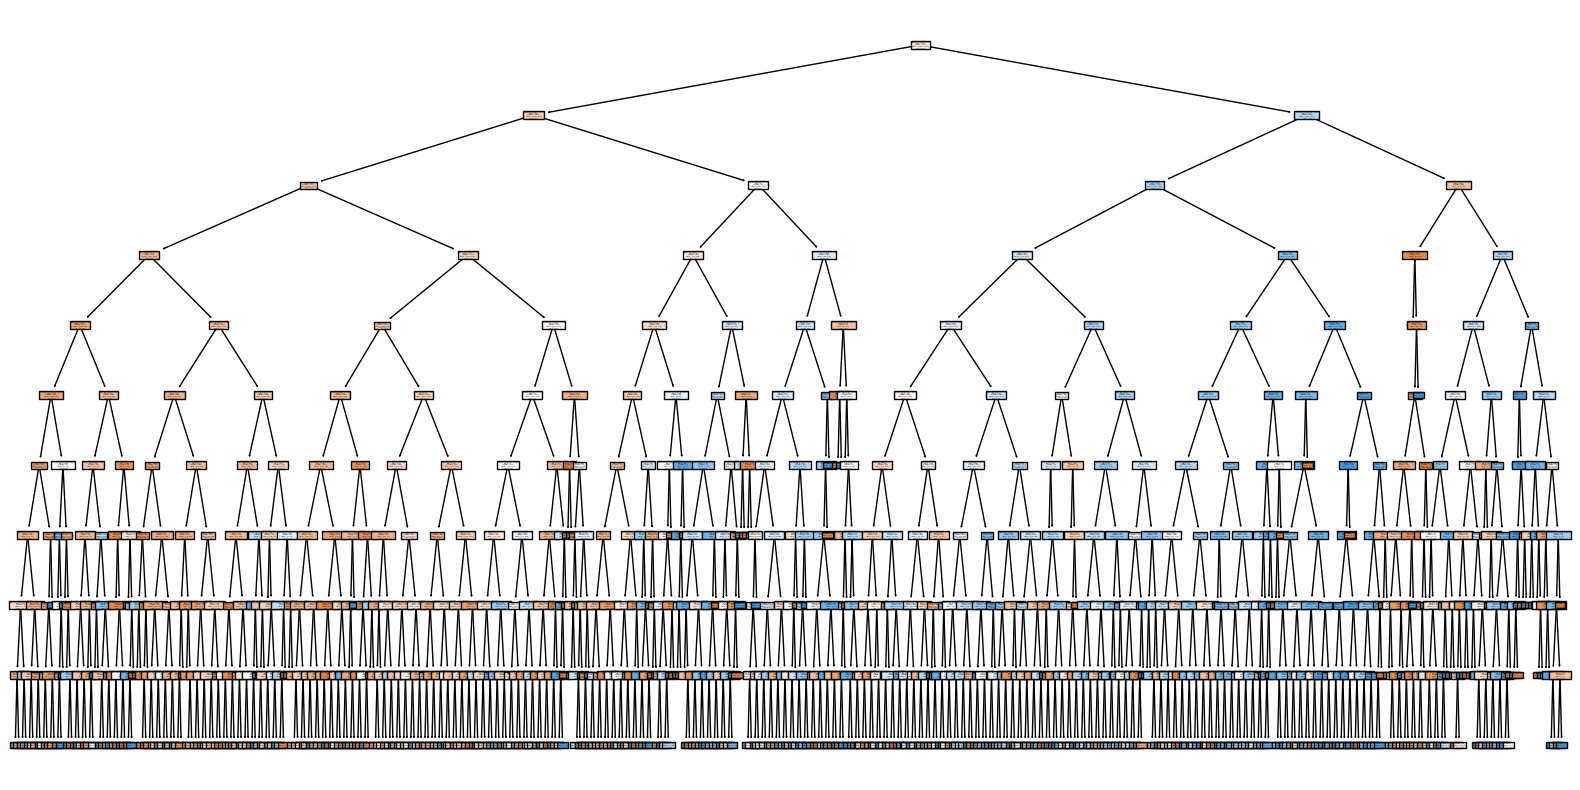

In [22]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=data1.columns, class_names=True)
plt.show()

In [23]:
from sklearn.metrics import accuracy_score
old_train_predictions = model.predict(train_x)

old_train_accuracy = accuracy_score(train_y, old_train_predictions)
print("Training Accuracy: {:.2f}%".format(old_train_accuracy * 100))

old_test_predictions = model.predict(test_x)

old_test_accuracy = accuracy_score(test_y, old_test_predictions)
print("Test Accuracy: {:.2f}%".format(old_test_accuracy * 100))

Training Accuracy: 99.99%
Test Accuracy: 56.56%


In [24]:
pred = model.predict(test_x)

Q2 (a)

In [25]:
from sklearn.metrics import accuracy_score
accuaracy = accuracy_score(test_y,pred)
print(accuaracy*100,"%")

56.56149388280747 %


Q2 (b)

In [26]:
nodes = model.tree_.node_count
print("Nodes of the Tree : ",nodes)
leaves = model.get_n_leaves()
print("Leaves of the Tree : ",leaves)
rules = nodes - leaves
print("Rules of the Tree : ",rules)
depth = model.get_depth()
print("Depth of the Tree : ",depth)

Nodes of the Tree :  19949
Leaves of the Tree :  9975
Rules of the Tree :  9974
Depth of the Tree :  45


Q2 (c)

In [27]:
importances = model.feature_importances_
first_split_index = np.argmax(importances)
first_split_variable = data1.columns[first_split_index]
print("Variable used in the first split:", first_split_variable)

Variable used in the first split: num_lab_procedures


Q2 (d)

In [28]:
importances = model.feature_importances_
top_5_indices = np.argsort(importances)[-5:][::-1]
top_5_variables = data1.columns[top_5_indices]
top_5_importances = importances[top_5_indices]

print("Top 5 important variables and their importance scores:")
for variable, importance in zip(top_5_variables, top_5_importances):
    print(f"{variable}: {importance}")

Top 5 important variables and their importance scores:
num_lab_procedures: 0.16143521328020624
num_medications: 0.1291366884738118
time_in_hospital: 0.08520323883412496
number_inpatient: 0.06723466242507004
discharge_disposition_id: 0.059518163420654975


In [29]:
from sklearn.model_selection import GridSearchCV
dt_classifier = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=dt_classifier, param_grid = param_grid, cv=5)

grid_search.fit(x, y)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Cross-Validation Score: {:.2f}".format(best_score))

model2 = DecisionTreeClassifier(**best_params)

model2.fit(x, y)

Best Parameters:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Cross-Validation Score: 0.62


DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_split=5)

Q3 (a)

In [30]:
from sklearn.metrics import accuracy_score
train_predictions = model2.predict(train_x)

train_accuracy = accuracy_score(train_y, train_predictions)
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))

test_predictions = model2.predict(test_x)

test_accuracy = accuracy_score(test_y, test_predictions)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Training Accuracy: 62.65%
Test Accuracy: 62.75%


Q3 (b)

In [31]:
nodes = model2.tree_.node_count
leaves = model2.get_n_leaves()
rules = nodes - leaves
print("Number of Nodes in the Tree:", nodes)
print("Number of Leaves in the Tree:", leaves)
print("Number of Rules in the Tree:", rules)

Number of Nodes in the Tree: 61
Number of Leaves in the Tree: 31
Number of Rules in the Tree: 30


Q3 (c)

In [32]:
importances = model2.feature_importances_
first_split_index = np.argmax(importances)
first_split_variable = data1.columns[first_split_index]

print("Variable used in the first split:", first_split_variable)

Variable used in the first split: number_inpatient


Q3 (d)

In [33]:
importances = model2.feature_importances_
top_5_indices = np.argsort(importances)[-5:][::-1]
top_5_variables = data1.columns[top_5_indices]

print("Top 5 important variables and their importance scores:")
for variable, importance in zip(top_5_variables, importances[top_5_indices]):
    print(f"{variable}: {importance}")

Top 5 important variables and their importance scores:
number_inpatient: 0.5100006042239451
discharge_disposition_id: 0.13110579657127036
number_diagnoses: 0.09291767109652666
number_emergency: 0.07762504706253788
number_outpatient: 0.04921798308634709


Q3 (e)

In [34]:
train_predictions = model2.predict(train_x)
test_predictions = model2.predict(test_x)

train_accuracy = accuracy_score(train_y, train_predictions)
test_accuracy = accuracy_score(test_y, test_predictions)
print(train_accuracy*100,"Tr V/S Te",test_accuracy*100)

62.64764322772933 Tr V/S Te 62.74951706374758


Q4

In [35]:
from sklearn.metrics import roc_curve,roc_auc_score

original_test_probs = model.predict_proba(test_x)[:, 1]
fpr_original, tpr_original, _ = roc_curve(test_y, original_test_probs)
roc_auc_original = roc_auc_score(test_y, original_test_probs)

tuned_test_probs = model2.predict_proba(test_x)[:, 1]
fpr_tuned, tpr_tuned, _ = roc_curve(test_y, tuned_test_probs)
roc_auc_tuned = roc_auc_score(test_y, tuned_test_probs)

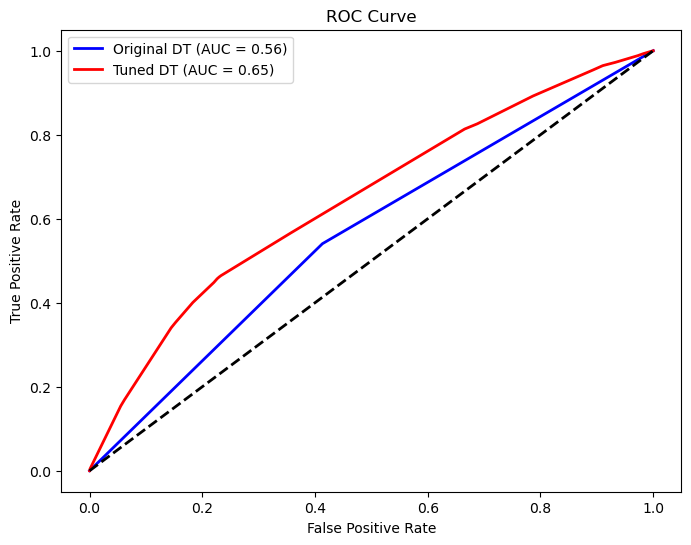

Original Decision Tree Test Accuracy: 56.56%
Tuned Decision Tree Test Accuracy: 62.75%


In [36]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_original, tpr_original, color='blue', lw=2, label='Original DT (AUC = {:.2f})'.format(roc_auc_original))
plt.plot(fpr_tuned, tpr_tuned, color='red', lw=2, label='Tuned DT (AUC = {:.2f})'.format(roc_auc_tuned))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print("Original Decision Tree Test Accuracy: {:.2f}%".format(old_test_accuracy * 100))
print("Tuned Decision Tree Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Differences between the two models and changes in performance could be due to the fine-tuning process. Fine-tuning allows the model to be optimized for the specific dataset, potentially improving its performance. In this case, the tuned decision tree might have a better balance between bias and variance, leading to improved accuracy and AUC. 

Q5

In [37]:
threshold = 0.5

potential_readmissions = (tuned_test_probs > threshold)

potential_readmitted_patients = data.loc[test_y.index[potential_readmissions]]

print("General Characteristics of Potential Readmitted Patients:")
print(potential_readmitted_patients.head(5))

General Characteristics of Potential Readmitted Patients:
            race  gender      age  admission_type_id  \
25917  Caucasian    Male  [30-40)                  2   
35493  Caucasian    Male  [60-70)                  1   
13712  Caucasian    Male  [60-70)                  1   
32180  Caucasian  Female  [70-80)                  1   
6404   Caucasian    Male  [70-80)                  2   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
25917                         1                    7                 1   
35493                         1                    7                 4   
13712                         1                    7                 1   
32180                         3                    7                13   
6404                          1                    7                 3   

      medical_specialty  num_lab_procedures  num_procedures  ...  \
25917  Emergency/Trauma                  64               0  ...   
35493           Invalid 

# Predictive Model Using Regression

In [38]:
data = pd.read_csv('D3.csv')

In [39]:
data1 = data.copy(deep=True)

In [40]:
data1.isnull().mean()*100

race                        1.962678
gender                      0.000000
age                         0.019318
admission_type_id           0.000000
discharge_disposition_id    0.000000
admission_source_id         0.000000
time_in_hospital            0.000000
medical_specialty           0.000000
num_lab_procedures          0.000000
num_procedures              0.000000
num_medications             0.000000
number_outpatient           0.000000
number_emergency            0.000000
number_inpatient            0.000000
number_diagnoses            0.000000
max_glu_serum               0.000000
A1Cresult                   0.000000
metformin                   0.000000
repaglinide                 0.000000
nateglinide                 0.000000
chlorpropamide              0.017386
glimepiride                 0.000000
acetohexamide               0.000000
glipizide                   0.000000
glyburide                   0.000000
tolbutamide                 0.000000
insulin                     0.000000
c

In [41]:
data1['race'].fillna(data1['race'].mode()[0],inplace=True)

In [42]:
data1['chlorpropamide'].fillna(data1['chlorpropamide'].mode()[0],inplace=True)

In [43]:
data1['age'].fillna(data1['age'].mode()[0],inplace=True)

In [44]:
data1.isnull().mean()

race                        0.0
gender                      0.0
age                         0.0
admission_type_id           0.0
discharge_disposition_id    0.0
admission_source_id         0.0
time_in_hospital            0.0
medical_specialty           0.0
num_lab_procedures          0.0
num_procedures              0.0
num_medications             0.0
number_outpatient           0.0
number_emergency            0.0
number_inpatient            0.0
number_diagnoses            0.0
max_glu_serum               0.0
A1Cresult                   0.0
metformin                   0.0
repaglinide                 0.0
nateglinide                 0.0
chlorpropamide              0.0
glimepiride                 0.0
acetohexamide               0.0
glipizide                   0.0
glyburide                   0.0
tolbutamide                 0.0
insulin                     0.0
change                      0.0
diabetesMed                 0.0
readmitted                  0.0
dtype: float64

## Q2

In [45]:
cat = data1.select_dtypes(include='object')
num = data1.select_dtypes(include='number')
boolean = data1.select_dtypes(include='bool')

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in cat:
    cat[column] = le.fit_transform(cat[column])

In [47]:
data1 = pd.concat([cat,num,boolean],axis=1)

In [48]:
x = data1.drop(columns=['readmitted'])
y = data1['readmitted']

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=16)

In [50]:
from sklearn.linear_model import LinearRegression

re_model = LinearRegression()
re_model.fit(x_train,y_train)

LinearRegression()

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

regression_model = LinearRegression()

grid_search = GridSearchCV(estimator=regression_model, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Cross-Validation Score: {:.2f}".format(best_score))

re_model2 = LinearRegression(**best_params)
re_model2.fit(x_train, y_train)


Best Parameters:  {'fit_intercept': True, 'positive': False}
Best Cross-Validation Score: 0.07


LinearRegression()

- The chosen model is a linear regression model. Linear regression is a widely used algorithm for regression tasks, especially when there is a linear relationship between the input features and the target variable. It is a simple, interpretable, and computationally efficient model. Additionally, it provides coefficients for each feature, allowing us to understand the impact of individual features on the target variable.

- The regression function used is the Linear Regression function, provided by scikit-learn's LinearRegression class.

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [53]:
re_model2.fit(x_train_scaled,y_train)

LinearRegression()

In [54]:
from sklearn.metrics import mean_absolute_error

pred1 = re_model.predict(x_test)
pred2 = re_model2.predict(x_test)

mae1 = mean_absolute_error(y_test, pred1)
print("Mean Squared Error of first model non scaled: {:.2f}".format(mae1))

mae2 = mean_absolute_error(y_test, pred2)
print("Mean Squared Error of second model scaled: {:.2f}".format(mae2))

Mean Squared Error of first model non scaled: 0.46
Mean Squared Error of second model scaled: 0.80


In [55]:
coefficients = re_model2.coef_
variable_names = list(x_train.columns)

top_5_indices = np.argsort(np.abs(coefficients))[::-1][:5]
# Get the names of top 5 important variables
top_5_variables = [variable_names[i] for i in top_5_indices]

print("Top 5 important variables in the model (in order):", top_5_variables)

Top 5 important variables in the model (in order): ['number_inpatient', 'number_outpatient', 'diabetesMed', 'number_emergency', 'number_diagnoses']


For regression tasks, you don't use classification accuracy. Instead, you use regression metrics like Mean Squared Error (MSE) or R-squared to evaluate the model's performance. In your code, you've already calculated the Mean Squared Error (MAE) for both models on the test dataset.

In [56]:
train_predictions = re_model2.predict(x_train_scaled)
test_predictions = re_model2.predict(x_test_scaled)

# Calculate Mean Absolute Error for training and test datasets
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

print("Mean Absolute Error on Training Data:", train_mae)
print("Mean Absolute Error on Test Data:", test_mae)

Mean Absolute Error on Training Data: 0.4622330009237144
Mean Absolute Error on Test Data: 0.46278003133897844


UnderFitting

# Q3

In [57]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Feature selection using Recursive Feature Elimination (RFE)
selector = RFE(estimator=LinearRegression())
x_train_re_model3 = selector.fit_transform(x_train_scaled, y_train)
x_test_re_model3 = selector.transform(x_test_scaled)

# Define the parameter grid for GridSearchCV
param_grid_re_model3 = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Create a Linear Regression model
re_model3 = LinearRegression()

# Instantiate GridSearchCV for RFE selected features
grid_search_re_model3 = GridSearchCV(estimator=re_model3, param_grid=param_grid_re_model3, cv=5)
grid_search_re_model3.fit(x_train_re_model3, y_train)

best_params_re_model3 = grid_search_re_model3.best_params_
best_score_re_model3 = grid_search_re_model3.best_score_

print("Best Parameters after RFE (re_model3): ", best_params_re_model3)
print("Best Cross-Validation Score after RFE (re_model3): {:.2f}".format(best_score_re_model3))

# Create a new Linear Regression model with the best parameters after RFE
best_re_model3 = LinearRegression(**best_params_re_model3)
best_re_model3.fit(x_train_re_model3, y_train)

# Predictions on RFE selected features
pred_re_model3 = best_re_model3.predict(x_test_re_model3)

# Calculate Mean Absolute Error for RFE selected features
mae_re_model3 = mean_absolute_error(y_test, pred_re_model3)
print("Mean Absolute Error after RFE (re_model3): {:.2f}".format(mae_re_model3))


Best Parameters after RFE (re_model3):  {'fit_intercept': True, 'positive': False}
Best Cross-Validation Score after RFE (re_model3): 0.07
Mean Absolute Error after RFE (re_model3): 0.46


Q3

(a) Not Really because the accuaracy(error) remained the same...


In [58]:
re_model3.fit(x_train_re_model3, y_train)

train_predictions = re_model3.predict(x_train_re_model3)
test_predictions = re_model3.predict(x_test_re_model3)

train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

print("Mean Absolute Error on Training Data:", train_mae)
print("Mean Absolute Error on Test Data:", test_mae)


Mean Absolute Error on Training Data: 0.46255530963119545
Mean Absolute Error on Test Data: 0.46313647384510886


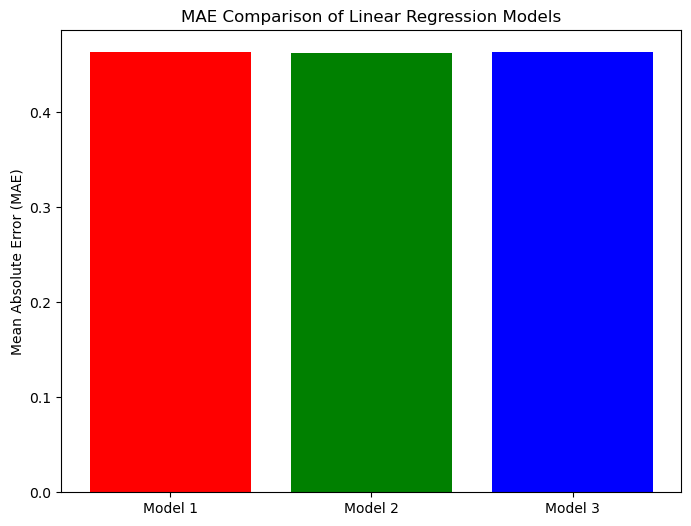

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Predictions from the three models
y_pred1 = re_model.predict(x_test)
y_pred2 = re_model2.predict(x_test_scaled)
y_pred3 = re_model3.predict(x_test_re_model3)

# Calculate MAE for each model
mae_model1 = mean_absolute_error(y_test, y_pred1)
mae_model2 = mean_absolute_error(y_test, y_pred2)
mae_model3 = mean_absolute_error(y_test, y_pred3)

# Models' names for labeling the bars
models = ['Model 1', 'Model 2', 'Model 3']
mae_values = [mae_model1, mae_model2, mae_model3]

# Plotting the MAE scores
plt.figure(figsize=(8, 6))
plt.bar(models, mae_values, color=['red', 'green', 'blue'])
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE Comparison of Linear Regression Models')
plt.show()


UnderFitting


In [60]:
coefficients_re_model3 = re_model3.coef_

variable_names_re_model3 = list(x_train.columns[selector.support_])

coefficients_dict = dict(zip(variable_names_re_model3, coefficients_re_model3))

top_3_variables_re_model3 = sorted(coefficients_dict, key=lambda k: abs(coefficients_dict[k]), reverse=True)[:3]

print("Top 3 important variables in the model (in order):", top_3_variables_re_model3)

Top 3 important variables in the model (in order): ['number_inpatient', 'number_outpatient', 'diabetesMed']


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [24]:
data = pd.read_csv('D3.csv')

In [25]:
data['race'].fillna(data['race'].mode()[0], inplace=True)
data['age'].fillna(data['age'].mode()[0], inplace=True)
data['chlorpropamide'].fillna(data['chlorpropamide'].mode()[0], inplace=True)

In [26]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted
admission_type_id,1.000000,-0.004234,-0.350782,-0.013757,-0.117922,0.192492,0.079539,0.000970,-0.034851,-0.043622,-0.137786,0.027076,0.021844,-0.043308
discharge_disposition_id,-0.004234,1.000000,-0.012826,0.181898,0.085851,0.000245,0.146210,0.018061,-0.014962,0.038773,0.094571,0.033806,0.017033,-0.001298
admission_source_id,-0.350782,-0.012826,1.000000,0.012714,0.249553,-0.134632,-0.067216,-0.038708,0.057553,0.049691,0.118684,-0.006343,-0.001273,0.035848
time_in_hospital,-0.013757,0.181898,0.012714,1.000000,0.382264,0.151510,0.491196,0.007087,-0.000382,0.072117,0.218771,0.133878,0.069095,0.046139
num_lab_procedures,-0.117922,0.085851,0.249553,0.382264,1.000000,0.024086,0.311313,0.008896,0.013959,0.033782,0.198608,0.102616,0.038009,0.049446
num_procedures,0.192492,0.000245,-0.134632,0.151510,0.024086,1.000000,0.348383,-0.025446,-0.039481,-0.069661,0.055303,-0.000245,-0.014612,-0.048470
num_medications,0.079539,0.146210,-0.067216,0.491196,0.311313,0.348383,1.000000,0.036444,0.001040,0.068755,0.243610,0.248822,0.188633,0.053888
number_outpatient,0.000970,0.018061,-0.038708,0.007087,0.008896,-0.025446,0.036444,1.000000,0.071392,0.114748,0.060678,-0.006856,-0.000970,0.091695
number_emergency,-0.034851,-0.014962,0.057553,-0.000382,0.013959,-0.039481,0.001040,0.071392,1.000000,0.287212,0.032862,0.016313,0.011001,0.115071
number_inpatient,-0.043622,0.038773,0.049691,0.072117,0.033782,-0.069661,0.068755,0.114748,0.287212,1.000000,0.073970,0.027586,0.020165,0.232761


In [27]:
cat = data.select_dtypes(include='object')
num = data.select_dtypes(include='number')
boolean = data.select_dtypes(include='bool')

In [28]:
label_encoders = {}
for col in cat:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

In [29]:
label_encoders = {}
for col in boolean:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

In [30]:
data.drop(['max_glu_serum', 'A1Cresult'], axis=1, inplace=True)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(data, data['readmitted'], test_size=0.25, random_state=13)

In [34]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
rs = 10
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train,y_train)

model_nn = MLPClassifier(random_state=rs)
model_nn.fit(x_train, y_train)

print("Train accuracy:", model_nn.score(x_train, y_train))
print("Test accuracy:", model_nn.score(x_test, y_test))

y_pred = model_nn.predict(x_test)
print(classification_report(y_test, y_pred))

print(model_nn)

Train accuracy: 1.0
Test accuracy: 0.7709009426672848
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      7087
           1       1.00      0.49      0.66      5855

    accuracy                           0.77     12942
   macro avg       0.85      0.75      0.74     12942
weighted avg       0.84      0.77      0.75     12942

MLPClassifier(random_state=10)


Q2 

b) The classification accuaracy on the testing set is at 0.77 which is about 77%, while the training accuaracy came about to be 100%

c) Yes! the training process resulted in a good model so far and converged we can say that by seeing that it didnt give us any warnings about convergence

Q3

In [37]:
params = {'hidden_layer_sizes': [(x,) for x in range(5, 86, 20)]}

gs1 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs),return_train_score=True, cv=4, n_jobs=-1)
gs1.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=MLPClassifier(random_state=10), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(5,), (25,), (45,), (65,),
                                                (85,)]},
             return_train_score=True)

Q3 

b) The Test accuaracy dropped in this model to give only 0.63 which is said to be around 63%, while the training accuaracy came about to be 100%
c) The process did not converge but also did not result in the best model because the accuaracy dropped by more than 14% so we cannot say that the model performed better
d) Yes there are signs of overfitting found on the model because as the training accuracy is 100% but the testing accuaracy comes out to be around 63%.

In [40]:
print("Train accuracy:", gs1.score(x_train, y_train))
print("Test accuracy:", gs1.score(x_test, y_test))

Train accuracy: 1.0
Test accuracy: 0.6336733116983465


Q4

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('D3.csv')

data['race'].fillna(data['race'].mode()[0], inplace=True)
data['age'].fillna(data['age'].mode()[0], inplace=True)
data['chlorpropamide'].fillna(data['chlorpropamide'].mode()[0], inplace=True)

cat = data.select_dtypes(include='object')
num = data.select_dtypes(include='number')
boolean = data.select_dtypes(include='bool')

label_encoders = {}
for col in cat:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

label_encoders = {}
for col in boolean:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

data.drop(['max_glu_serum', 'A1Cresult'], axis=1, inplace=True)

x_train, x_test, y_train, y_test = train_test_split(data, data['readmitted'], test_size=0.25, random_state=13)

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

rs=10

# Feature selection using Decision Tree
dt = DecisionTreeClassifier(random_state=rs)
selector = SelectFromModel(dt)
selector.fit(x_train, y_train)

SelectFromModel(estimator=DecisionTreeClassifier(random_state=10))

In [9]:
# Transform the data to keep only selected features
x_train_selected = selector.transform(x_train)
x_test_selected = selector.transform(x_test)

# Standardize the data
scaler = StandardScaler()
x_train_selected = scaler.fit_transform(x_train_selected)
x_test_selected = scaler.transform(x_test_selected)

In [10]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu', 'logistic'],
    'solver': ['adam'],
    'max_iter': [100]
}

In [11]:
nn = MLPClassifier(random_state=rs)
grid_search = GridSearchCV(nn, param_grid, cv=3)
grid_search.fit(x_train_selected, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=10),
             param_grid={'activation': ['relu', 'logistic'],
                         'hidden_layer_sizes': [(50,), (100,)],
                         'max_iter': [100], 'solver': ['adam']})

In [14]:
print("Best Parameters: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

train_accuracy = best_model.score(x_train_selected, y_train)
print("Training accuracy:", train_accuracy)

y_pred = best_model.predict(x_test_selected)
print("Test accuracy:", best_model.score(x_test_selected, y_test))
print(classification_report(y_test, y_pred))


Best Parameters:  {'activation': 'relu', 'hidden_layer_sizes': (50,), 'max_iter': 100, 'solver': 'adam'}
Training accuracy: 1.0
Test accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7087
           1       1.00      1.00      1.00      5855

    accuracy                           1.00     12942
   macro avg       1.00      1.00      1.00     12942
weighted avg       1.00      1.00      1.00     12942



Q4

a) 

b) The accuaracy is 100% of training and 100% on testing set

c) 

d) No there is no sign of overfitting as the training and testing accuracy are both at 100% and the model performed very much best.
